# SEA ANIMALS DETECTION AND RECOGNITION USING DEEP LEARNING AND USING TRANSFER LEARNING

Most life forms began their evolution in aquatic environments. About 90% of the world's living space is provided by the oceans in terms of volume. Fish, which are only found in water, are the first known vertebrates. Some of these transformed into amphibians, which dwell both on land and in water for parts of the day. A few subgroups of one group of amphibians, which also included sea turtles, seals, manatees, and whales, developed into reptiles and mammals. Some underwater habitats are supported by plant life that grows in the water, such as kelp and other algae. The base of the ocean food chain is made up primarily of phytoplankton, which are important primary producers

# IMPORT THE LIBRARIES

In [43]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

# EXPLORATORY ANALYSIS

In [2]:
DIR = r'C:\Users\Venus\Downloads\sea animals'
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes

['Clams',
 'Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Fish',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Otter',
 'Penguin',
 'Puffers',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Shrimp',
 'Squid',
 'Starfish',
 'Turtle_Tortoise',
 'Whale']

In [3]:
# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column

label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.jpg':               # If filename contains .png
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label 
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [4]:
df.head()

path  label
0  C:\Users\Venus\Downloads\sea animals\Clams\100...  Clams
1  C:\Users\Venus\Downloads\sea animals\Clams\100...  Clams
2  C:\Users\Venus\Downloads\sea animals\Clams\100...  Clams
3  C:\Users\Venus\Downloads\sea animals\Clams\100...  Clams
4  C:\Users\Venus\Downloads\sea animals\Clams\100...  Clams

In [5]:
df.path[0]

'C:\\Users\\Venus\\Downloads\\sea animals\\Clams\\10004815975_14842bfd9d_o.jpg'

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13666 entries, 0 to 13665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    13666 non-null  object
 1   label   13666 non-null  object
dtypes: object(2)
memory usage: 213.7+ KB


In [7]:
#Checking the value counts of each of the datasets
#df['label']=df['label'].astype('category')
df['label'].value_counts()

Turtle_Tortoise    1898
Jelly Fish          842
Dolphin             774
Sharks              587
Sea Urchins         578
Whale               569
Octopus             561
Puffers             530
Sea Rays            517
Nudibranchs         500
Otter               499
Lobster             498
Corals              498
Clams               497
Crabs               497
Eel                 496
Starfish            495
Fish                493
Shrimp              488
Penguin             481
Squid               480
Seahorse            476
Seal                412
Name: label, dtype: int64

In [10]:
# Drop rows where label is 'Turtle_Tortoise'
df = df[df['label'] != 'Turtle_Tortoise']

# Checking the value counts after dropping
print(df['label'].value_counts())


Jelly Fish     842
Dolphin        774
Sharks         587
Sea Urchins    578
Whale          569
Octopus        561
Puffers        530
Sea Rays       517
Nudibranchs    500
Otter          499
Lobster        498
Corals         498
Clams          497
Crabs          497
Eel            496
Starfish       495
Fish           493
Shrimp         488
Penguin        481
Squid          480
Seahorse       476
Seal           412
Name: label, dtype: int64


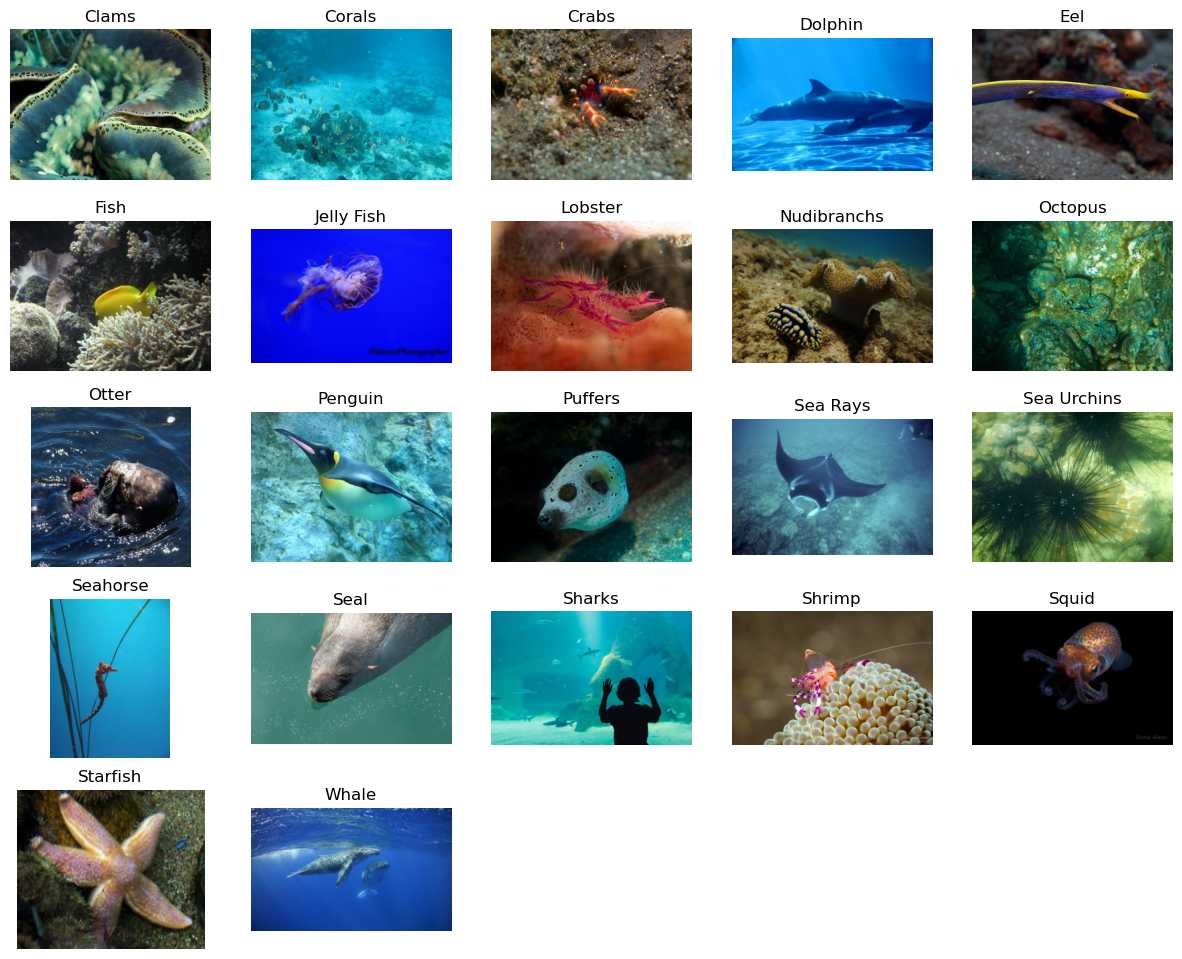

In [11]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(5, 5, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

# Test-Train Split

In [12]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [13]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(9414, 2)
(2354, 2)


# 
Image Generation and Preprocessing

In [14]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 7532 validated image filenames belonging to 22 classes.
Found 1882 validated image filenames belonging to 22 classes.
Found 2354 validated image filenames belonging to 22 classes.


In [16]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Whale': 21}

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Whale': 21}

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Whale': 21}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


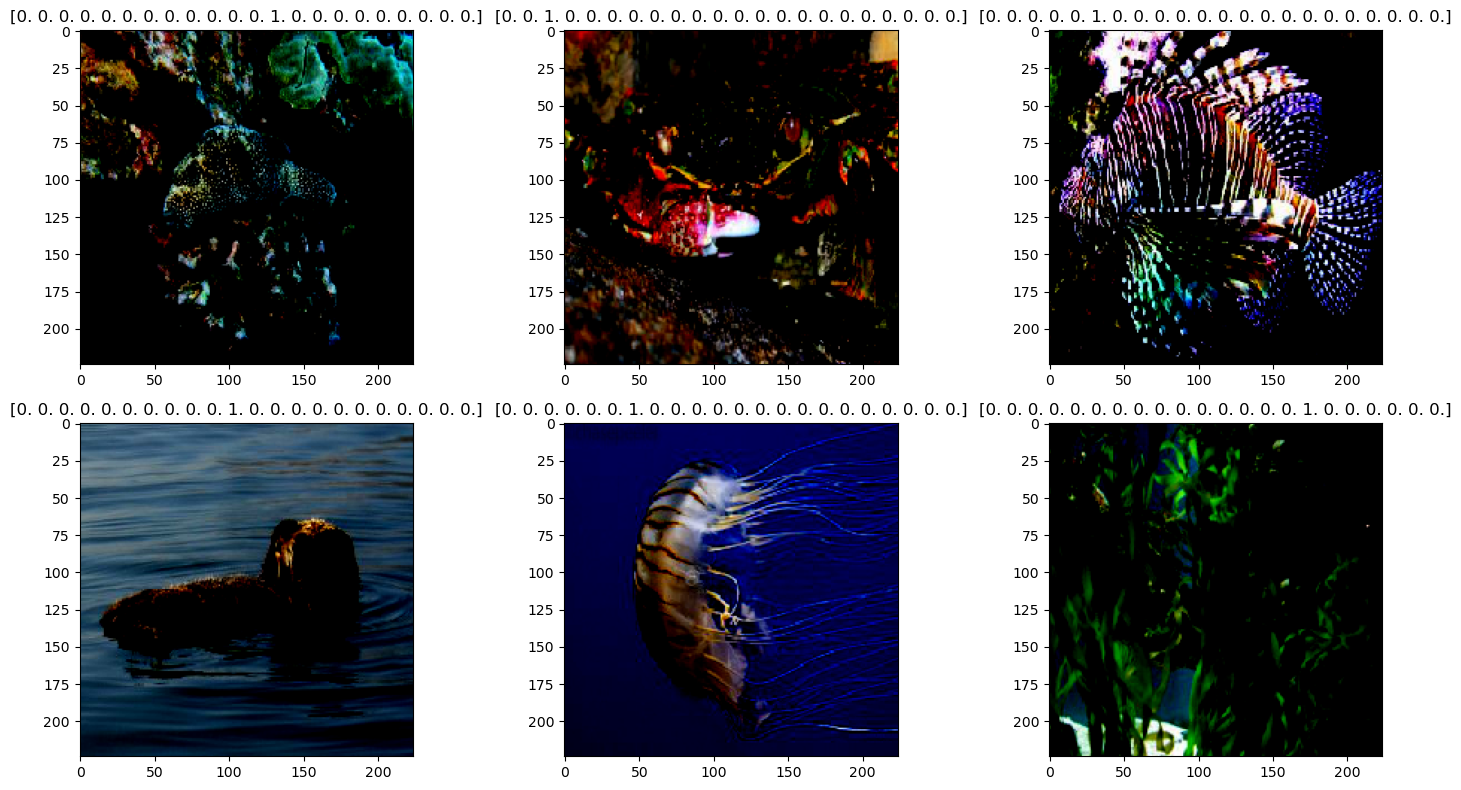

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()
for i in range(6):
    img, label = next(val_images)
    ax[i].imshow(img[0])  
    ax[i].set_title(label[0])

plt.tight_layout() 
plt.show()  

# Model Training and Evaluation

In [19]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [24]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(22, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])



In [27]:
history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Epoch 1/5
236/236 [==============================] - 330s 1s/step - loss: 1.1219 - accuracy: 0.6697 - val_loss: 0.8845 - val_accuracy: 0.7327
Epoch 2/5
236/236 [==============================] - 271s 1s/step - loss: 0.6632 - accuracy: 0.7922 - val_loss: 0.8025 - val_accuracy: 0.7630
Epoch 3/5
236/236 [==============================] - 259s 1s/step - loss: 0.5085 - accuracy: 0.8380 - val_loss: 0.8092 - val_accuracy: 0.7763
Epoch 4/5
236/236 [==============================] - 200s 848ms/step - loss: 0.3759 - accuracy: 0.8805 - val_loss: 0.8698 - val_accuracy: 0.7524
Epoch 5/5
236/236 [==============================] - 195s 827ms/step - loss: 0.2960 - accuracy: 0.9085 - val_loss: 0.8898 - val_accuracy: 0.7662


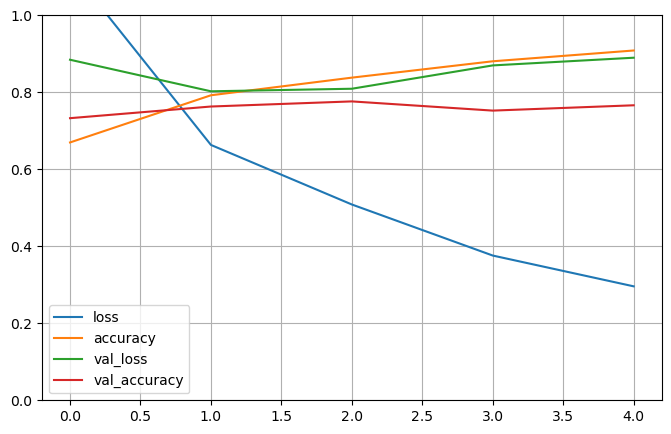

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.90929
Test Accuracy: 76.04%


In [30]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)


74/74 [==============================] - 50s 653ms/step


In [31]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred 
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x]) 

In [32]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)# drop=true allows dataset to not display extra column
pred_df.head(10)

path       label        pred
0  C:\Users\Venus\Downloads\sea animals\Squid\294...       Squid       Squid
1  C:\Users\Venus\Downloads\sea animals\Otter\595...       Otter       Otter
2  C:\Users\Venus\Downloads\sea animals\Starfish\...    Starfish    Starfish
3  C:\Users\Venus\Downloads\sea animals\Whale\228...       Whale       Whale
4  C:\Users\Venus\Downloads\sea animals\Whale\150...       Whale       Whale
5  C:\Users\Venus\Downloads\sea animals\Octopus\1...     Octopus     Octopus
6  C:\Users\Venus\Downloads\sea animals\Seal\9578...        Seal        Seal
7  C:\Users\Venus\Downloads\sea animals\Jelly Fis...  Jelly Fish  Jelly Fish
8  C:\Users\Venus\Downloads\sea animals\Puffers\3...     Puffers     Puffers
9  C:\Users\Venus\Downloads\sea animals\Jelly Fis...  Jelly Fish  Jelly Fish

#  correct prediction

In [36]:
pred_df.path[1]

'C:\\Users\\Venus\\Downloads\\sea animals\\Otter\\5954963907_341b21e8f0_o.jpg'

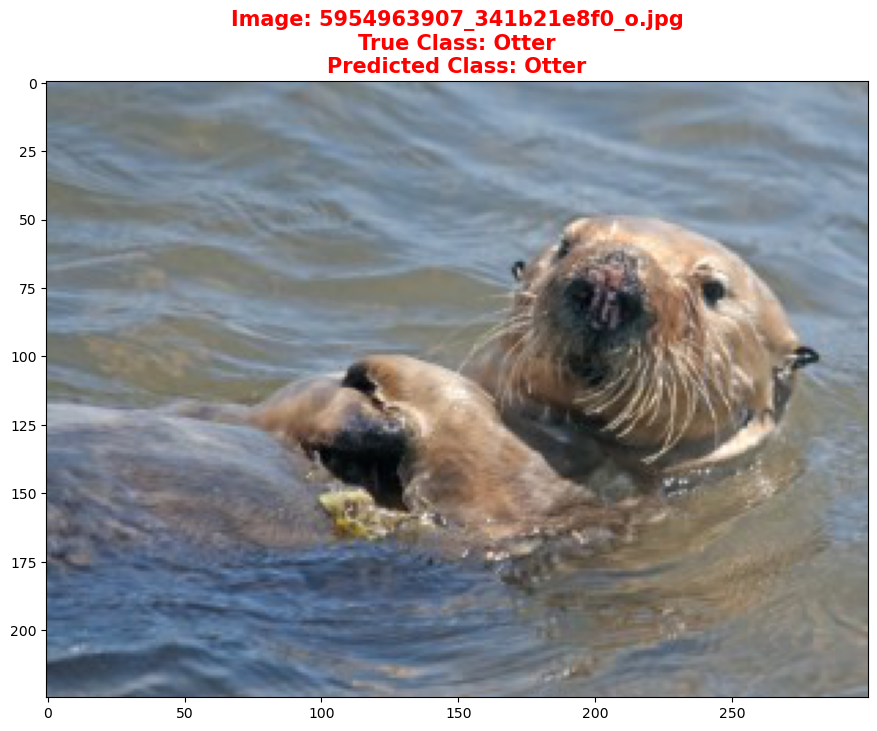

In [37]:
import os

# Check if pred_df contains data and has enough rows
if not pred_df.empty and len(pred_df) > 1:
    # Assuming to display the image at index 1
    plt.figure(figsize=(15, 8))
    plt.imshow(plt.imread(pred_df.path[1]))

    # Split the path and extract relevant components
    title1 = os.path.basename(os.path.dirname(pred_df.path[1]))
    title2 = os.path.basename(pred_df.path[1])
    title3 = pred_df.pred[1]

    # Display title with extracted components
    plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}', color='r', weight='bold', fontsize=15)
    plt.show()
else:
    print("pred_df is either empty or doesn't have enough rows to access index 1.")


In [38]:
pred_df.path[2]

'C:\\Users\\Venus\\Downloads\\sea animals\\Starfish\\5373097742_61fa8fb17d_o.jpg'

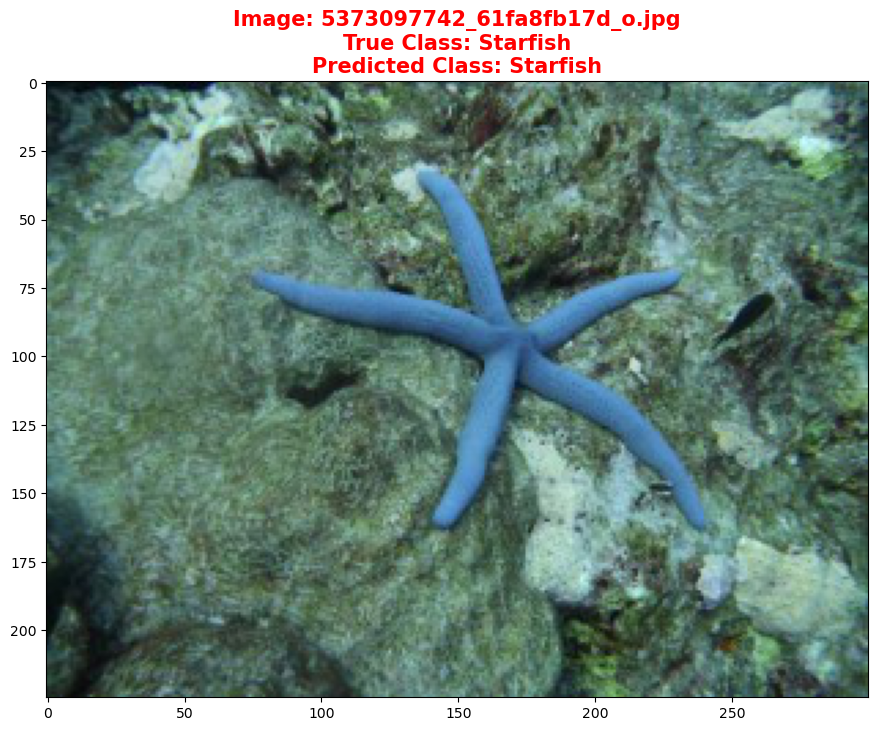

In [39]:
import os

# Check if pred_df contains data and has enough rows
if not pred_df.empty and len(pred_df) > 1:
    # Assuming you want to display the image at index 2
    plt.figure(figsize=(15, 8))
    plt.imshow(plt.imread(pred_df.path[2]))

    # Split the path and extract relevant components
    title1 = os.path.basename(os.path.dirname(pred_df.path[2]))
    title2 = os.path.basename(pred_df.path[2])
    title3 = pred_df.pred[2]

    # Display title with extracted components
    plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}', color='r', weight='bold', fontsize=15)
    plt.show()
else:
    print("pred_df is either empty or doesn't have enough rows to access index 1.")


# incorrect path

In [40]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

path     label     pred
10    C:\Users\Venus\Downloads\sea animals\Squid\475...     Squid  Octopus
15    C:\Users\Venus\Downloads\sea animals\Lobster\7...   Lobster   Shrimp
16    C:\Users\Venus\Downloads\sea animals\Shrimp\15...    Shrimp    Clams
19    C:\Users\Venus\Downloads\sea animals\Octopus\7...   Octopus   Sharks
23    C:\Users\Venus\Downloads\sea animals\Whale\Wha...     Whale  Dolphin
...                                                 ...       ...      ...
2327  C:\Users\Venus\Downloads\sea animals\Puffers\3...   Puffers    Squid
2328  C:\Users\Venus\Downloads\sea animals\Sharks\54...    Sharks     Seal
2329  C:\Users\Venus\Downloads\sea animals\Whale\337...     Whale  Dolphin
2336  C:\Users\Venus\Downloads\sea animals\Seahorse\...  Seahorse  Lobster
2351  C:\Users\Venus\Downloads\sea animals\Puffers\7...   Puffers    Squid

[564 rows x 3 columns]

Accuracy Score: 0.7604078164825828


<Axes: >

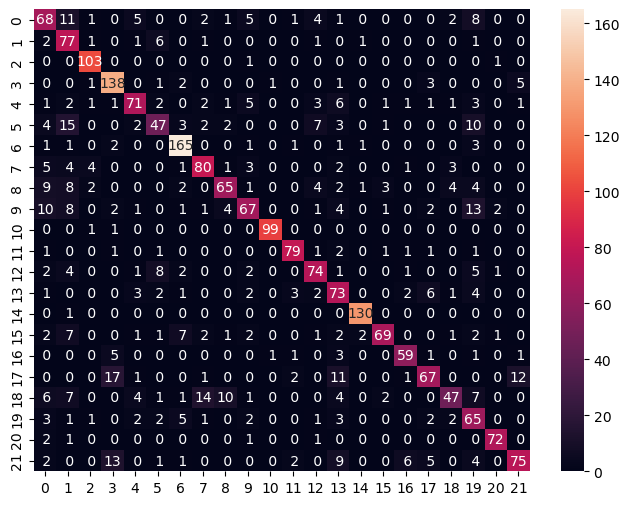

In [41]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

# Generating the Classification Report for in-depth analysis

In [42]:

print(classification_report(pred_df['label'],pred_df['pred']))

              precision    recall  f1-score   support

       Clams       0.57      0.62      0.60       109
      Corals       0.52      0.85      0.65        91
       Crabs       0.90      0.98      0.94       105
     Dolphin       0.77      0.91      0.83       152
         Eel       0.77      0.69      0.73       103
        Fish       0.65      0.49      0.56        96
  Jelly Fish       0.86      0.94      0.90       176
     Lobster       0.75      0.77      0.76       104
 Nudibranchs       0.76      0.62      0.68       105
     Octopus       0.72      0.57      0.64       117
       Otter       0.98      0.98      0.98       101
     Penguin       0.89      0.89      0.89        89
     Puffers       0.74      0.73      0.74       101
    Sea Rays       0.57      0.73      0.64       100
 Sea Urchins       0.96      0.99      0.98       131
    Seahorse       0.88      0.68      0.77       101
        Seal       0.82      0.82      0.82        72
      Sharks       0.76    

# We have achieved an accuracy of 76%, which clearly demonstrates the power of transfer learning.